Append path to pyfor module

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('../pyfor'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import cloud
import numpy as np
import matplotlib.pyplot as plt

In [3]:
tile=cloud.Cloud("data/NEON_D03_OSBS_DP1_405000_3276000_classified_point_cloud.laz")

## Point cloud statistics

In [4]:
print("Number of points: %d" % tile.las.header.count)

Number of points: 2912035


In [5]:
tile.las.header.max

[405999.98999999999, 3276999.9900000002, 945.36000000000001]

In [6]:
tile.las.header.min

[405000.0, 3276227.8599999999, -238.43000000000001]

The point cloud is organized into a numpy array

In [7]:
type(tile.las.points)

numpy.ndarray

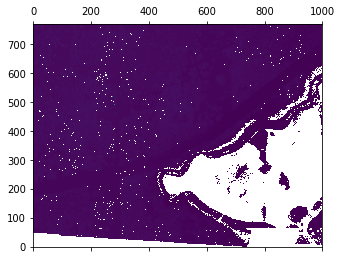

In [ ]:
tile.plot()

Looks like we have some outliers that need to be removed.

# Filter Points

In [9]:
tile.filter_z(min=0,max=100)

In [10]:
tile.las.header.max

[405999.98999999999, 3276999.9900000002, 67.549999999999997]

In [11]:
tile.las.points[:,2].max()

67.549999999999997

In [12]:
tile.las.z.max()

67.549999999999997

In [13]:
print("Number of points: %d" % tile.las.header.count)

Number of points: 2912013


In [14]:
gridded_df=tile.grid(1)

In [15]:
gridded_df.las.points[:,2].max()

67.549999999999997

In [16]:
gridded_df.las.z.max()

67.549999999999997

## 2D plot

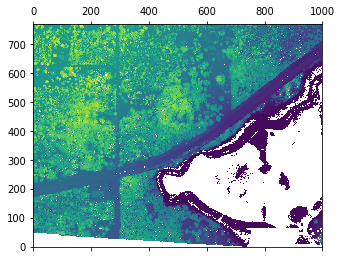

In [17]:
tile.plot()